In [1]:
## import libraries
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector, Bidirectional, CuDNNLSTM
import matplotlib.pyplot as plt
#import os
import tensorflow as tf
from keras.regularizers import l2

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
n_step = 9

In [4]:
def split(data, depth):
    dataset = data
    depth = depth
    X = np.zeros([int(depth), n_step, 3])
    Y = np.zeros([int(depth), n_step, 3])
    c = 0
    d = 0
    
    for i in range(int(depth)):
        for j in range(n_step):
            if d < dataset.shape[0]:
                X[i,j,:] = dataset[d, c:c+3]
                Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
                
                if ((c+3*n_step+3) != (dataset.shape[1])):
                    c +=3
                else:
                    c = 0
                    d += 1
        if (c-3) > 0:
            c = (c - 3*n_step + 3)
        else:
            c = c
            
    return X, Y

In [5]:
dataset = pd.read_csv('/home/lab606a/Documents/20200331/fixed/original data 60hz/test.csv', header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)
dataset.shape

(3149, 162)

In [6]:
maxlen_train = dataset.shape[1]+(n_step-1)*3
maxlen_train

186

In [7]:
dataset2 = pd.read_csv('/home/lab606a/Documents/20200331/fixed/original data 60hz/test6.csv', header=None)
dataset2 = dataset2.fillna(0)
dataset2 = np.array(dataset2)
dataset2.shape

(3378, 129)

In [8]:
maxlen_train2 = dataset2.shape[1]+(n_step-1)*3
maxlen_train2

153

In [9]:
dataset = sequence.pad_sequences(dataset, maxlen=maxlen_train, padding='post', dtype='float32')
dataset.shape

(3149, 186)

In [10]:
dataset2 = sequence.pad_sequences(dataset2, maxlen=maxlen_train, padding='post', dtype='float32')
dataset2.shape

(3378, 186)

In [11]:
print(dataset.shape)
print(dataset2.shape)

(3149, 186)
(3378, 186)


In [12]:
dataset = np.vstack((dataset, dataset2))
dataset.shape

(6527, 186)

In [13]:
depth_train = (int(dataset.shape[1]/3)+1-n_step-n_step)*dataset.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows

In [14]:
x_train, y_train = split(data=dataset, depth=depth_train)

In [15]:
model = Sequential()
model.add(CuDNNLSTM(256, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_regularizer=l2(0.01)))
#model.add(LSTM(256, activation='linear', return_sequences=True))
#model.add(LSTM(128, activation='linear', return_sequences=True))
#model.add(LSTM(64, activation='linear', return_sequences=True))
#model.add(CuDNNLSTM(64))
model.add(RepeatVector(x_train.shape[1]))
#model.add(LSTM(32, activation='linear', return_sequences=True))
#model.add(CuDNNLSTM(64, return_sequences=True))
#model.add(LSTM(128, activation='linear', return_sequences=True))
#model.add(LSTM(64, activation='linear', return_sequences=True))
model.add(CuDNNLSTM(256, return_sequences=True ,activity_regularizer=l2(0.01)))
model.add(TimeDistributed(Dense(3)))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [16]:
#model.summary()

In [43]:
history = model.fit(x_train, y_train, batch_size=20000, epochs=1000, shuffle=True)

Epoch 1/100
293715/293715 [==============================] - 3s 10us/step - loss: 27.1475 - acc: 0.8102
Epoch 2/100
293715/293715 [==============================] - 3s 9us/step - loss: 24.8353 - acc: 0.8745
Epoch 3/100
293715/293715 [==============================] - 3s 9us/step - loss: 23.8072 - acc: 0.8591
Epoch 4/100
293715/293715 [==============================] - 3s 10us/step - loss: 23.1326 - acc: 0.8562
Epoch 5/100
293715/293715 [==============================] - 3s 9us/step - loss: 22.5888 - acc: 0.8621
Epoch 6/100
293715/293715 [==============================] - 3s 10us/step - loss: 22.1376 - acc: 0.8597
Epoch 7/100
293715/293715 [==============================] - 3s 10us/step - loss: 21.7299 - acc: 0.8612
Epoch 8/100
293715/293715 [==============================] - 3s 11us/step - loss: 21.3708 - acc: 0.8602 1s - loss: 21.5474 -
Epoch 9/100
293715/293715 [==============================] - 3s 11us/step - loss: 21.0412 - acc: 0.8617
Epoch 10/100
293715/293715 [==================

293715/293715 [==============================] - 3s 11us/step - loss: 12.1705 - acc: 0.8670
Epoch 79/100
293715/293715 [==============================] - 3s 11us/step - loss: 12.1566 - acc: 0.8611
Epoch 80/100
293715/293715 [==============================] - 3s 11us/step - loss: 12.0888 - acc: 0.8618
Epoch 81/100
293715/293715 [==============================] - 3s 11us/step - loss: 12.0508 - acc: 0.8612
Epoch 82/100
293715/293715 [==============================] - 3s 11us/step - loss: 12.3815 - acc: 0.8613
Epoch 83/100
293715/293715 [==============================] - 3s 10us/step - loss: 12.1454 - acc: 0.8682
Epoch 84/100
293715/293715 [==============================] - 3s 11us/step - loss: 11.8941 - acc: 0.8653 2s - los
Epoch 85/100
293715/293715 [==============================] - 3s 11us/step - loss: 11.8687 - acc: 0.8653
Epoch 86/100
293715/293715 [==============================] - 3s 11us/step - loss: 11.8566 - acc: 0.8615
Epoch 87/100
293715/293715 [==============================]

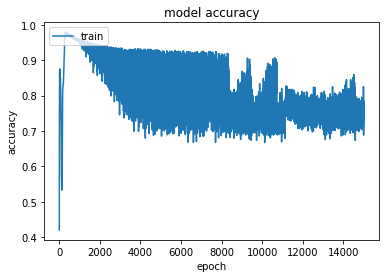

In [18]:
# plot accuracy history
# summarize history for accuracy 
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#acc_png = './training history/' + file_name + '_accuracy.png'
#plt.savefig(acc_png)
plt.show()

In [19]:
np.set_printoptions(suppress=True)

In [35]:
num = 1000

In [36]:
print(x_train[num,:,:])
print(y_train[num,:,:])

[[ 79.91120148 204.09899902  45.3044014 ]
 [ 79.93740082 195.16799927  44.03939819]
 [ 80.14820099 185.77400208  42.58110046]
 [ 79.78710175 178.35800171  40.45669937]
 [ 79.60009766 169.60400391  38.35770035]
 [ 79.57959747 159.71600342  35.72029877]
 [ 79.38629913 150.92599487  33.62080002]
 [ 79.01660156 142.45300293  30.87509918]
 [ 78.82610321 133.6519928   27.87319946]]
[[ 78.31590271 126.38800049  24.28590012]
 [ 78.12999725 117.55000305  20.86120033]
 [ 77.79199982 109.59200287  17.06089973]
 [ 77.30760193 102.39800262  12.71010017]
 [ 76.64450073  93.71389771   9.02048969]
 [ 76.16249847  85.33959961   4.32216978]
 [ 75.55619812  78.21289825  -0.25090399]
 [ 74.5684967   72.63140106   3.15877008]
 [ 73.77189636  66.43309784   7.29325008]]


In [48]:
y_pred = model.predict(x_train[num,:,:].reshape(1,9,3), verbose=1)
print(y_pred)

1/1 [==============================] - 0s 2ms/step
[[[ 78.843956  125.86742    24.15256  ]
  [ 78.34215   117.18487    20.954178 ]
  [ 77.689735  108.0788     16.697031 ]
  [ 77.08971   100.0627     12.279612 ]
  [ 76.67307    92.05899     7.9627395]
  [ 76.15143    84.01892     4.2557626]
  [ 75.49406    76.46855     3.2476673]
  [ 74.786255   69.68734     5.8441296]
  [ 73.99771    63.02037     9.373645 ]]]


In [49]:
#
error = y_train[num,:,:].reshape(1,9,3)-y_pred
error

array([[[-0.52805328,  0.52058411,  0.13334084],
        [-0.21215057,  0.36513519, -0.09297752],
        [ 0.1022644 ,  1.51320648,  0.36386871],
        [ 0.21789551,  2.33530426,  0.43048859],
        [-0.02857208,  1.65490723,  1.05775023],
        [ 0.01107025,  1.32067871,  0.0664072 ],
        [ 0.06214142,  1.74434662, -3.49857131],
        [-0.21775818,  2.94406128, -2.68535948],
        [-0.22581482,  3.41272736, -2.08039474]]])

In [31]:
#model.save('./saved model/20200505/prediction_all_test')